### Bitcoin Price Analysis
Source for data: https://min-api.cryptocompare.com/

In [317]:
# Import Libraries
import pandas as pd
import numpy as np
import urllib
import requests

# Chart libraries + settings
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
pd.options.mode.chained_assignment = None  # default='warn' - disable some pandas warnings

In [318]:
# Load Bitcoin Prices into a dataframe
# Ticker is customizable
ticker = "BTC"
# Cryptocompare URL and fiels
base_url = 'https://min-api.cryptocompare.com/data/histoday'
ticker_field = 'fsym'
field_dict = {'tsym': 'USD','allData': 'true'}
# Convert the field dict into a url encoded string
url_args = "&" + urllib.parse.urlencode(field_dict)
ticker = ticker.upper()
globalURL = (base_url + "?" + ticker_field + "=" + ticker + url_args)


In [319]:
# Request the data
resp = requests.get(url=globalURL)
data = resp.json()
data["Response"]

'Success'

In [320]:
# Parse the JSON into a Pandas DataFrame
try:
    df = pd.DataFrame.from_dict(data['Data'])
    df = df.rename(columns={'time': 'date'})
    df['date'] = pd.to_datetime(df['date'], unit='s')
    df.set_index('date', inplace=True)
    df_save = df[['close', 'open', 'high', 'low']]
except Exception as e:
    self.errors.append(e)
    df_save = None

In [321]:
# Include percentage change and other columns 
df = df_save
df['change'] = df['close'].pct_change()

In [322]:
# Show Log chart of data

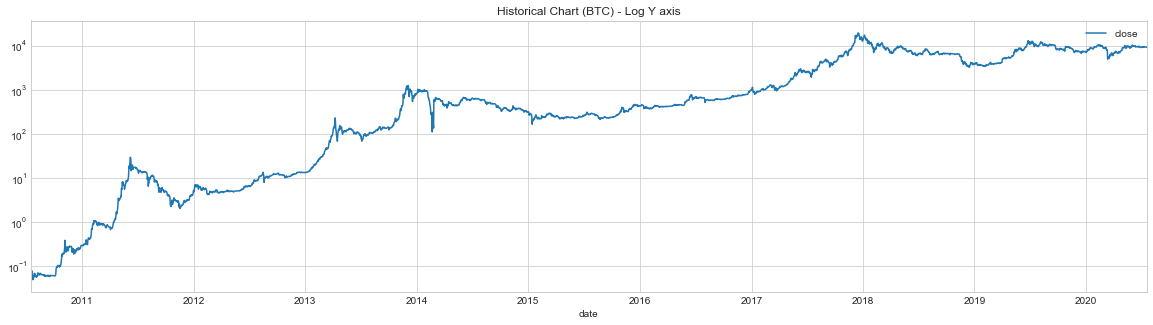

In [323]:
df[['close']].plot(kind='line', 
                   logy=True, 
                   figsize=(20,5), 
                   title='Historical Chart ('+ticker.upper()+') - Log Y axis')

In [324]:
def range_calc(days):
    # Check the range for this period between the intraday high and intraday low
    df['max_'+str(days)] = df['high'].rolling(days).max()
    df['min_'+str(days)] = df['low'].rolling(days).min()
    df['chg_'+str(days)] = (df['max_'+str(days)] / df['min_'+str(days)]) - 1

d = 20
range_calc(d)

In [325]:
# Latest % value for d days
last_chg = df['chg_'+str(d)][-1]
print ("Last Range = " + str(last_chg * 100) + "%")
print ("High = " +  str(df['max_'+str(d)][-1]))
print ("Low = " +  str(df['min_'+str(d)][-1]))
print ("Last = " +  str(df['close'][-1]))


Last Range = 5.995478910909924%
High = 9471.65
Low = 8935.9
Last = 9198.56


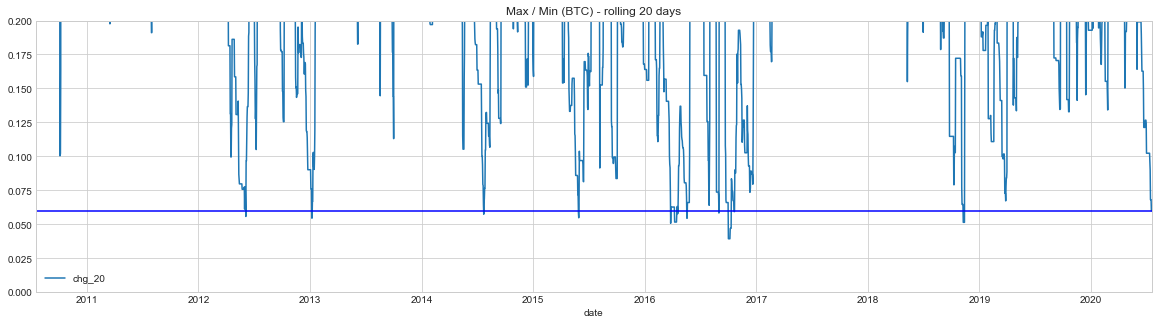

In [326]:
df[['chg_'+str(d)]].plot(
                    kind='line', 
                    figsize=(20,5), 
                    title='Max / Min ('+ticker.upper()+') - rolling '+str(d)+' days')

axes = plt.gca()
axes.set_ylim([0,0.2])
plt.axhline(df['chg_'+str(d)][-1], color="blue")
plt.show()

In [327]:
# Number of total days
total = df.count().close
total

3655

In [328]:
# How many where lower the current level?
df_lower = df.loc[df['chg_'+str(d)] < last_chg]
lower = df_lower.count().close
print ("Number of days where the range was lower = " + str(lower))
print ("Percentage of total = " + str(lower / total * 100) + "%")

Number of days where the range was lower = 37
Percentage of total = 1.012311901504788%


In [329]:
# Filter the list for points that are in consecutive days
df_lower['n_days'] = df_lower.index
df_lower['diff'] = (df_lower['n_days'] - df_lower['n_days'].shift()).dt.days
df_lower = df_lower[df_lower['diff'] != 1]
df_lower

,close,open,high,low,change,max_20,min_20,chg_20,n_days,diff
date,,,,,,,,,,
2012-06-04,5.266,5.205,5.279,5.18,0.011720,5.279,5.00,0.055800,2012-06-04,NaN
2013-01-06,13.450,13.440,13.520,13.36,0.000744,13.720,13.01,0.054573,2013-01-06,216.0
2014-07-23,621.690,622.530,624.990,621.00,-0.001349,642.220,607.32,0.057466,2014-07-23,562.0
2015-05-29,237.030,237.320,237.890,235.13,-0.001222,244.820,231.27,0.058590,2015-05-29,310.0
2016-03-26,416.510,415.710,417.710,413.93,0.001924,422.400,401.98,0.050799,2016-03-26,301.0
2016-04-08,417.690,420.140,423.510,415.50,-0.005831,427.360,406.36,0.051678,2016-04-08,13.0
2016-04-18,427.690,426.260,429.070,424.35,0.003355,432.000,408.40,0.057786,2016-04-18,3.0
2016-05-18,454.220,453.250,456.650,452.35,0.002140,464.180,440.21,0.054451,2016-05-18,29.0
2016-08-31,573.880,577.320,578.250,571.69,-0.005959,591.900,559.28,0.058325,2016-08-31,104.0


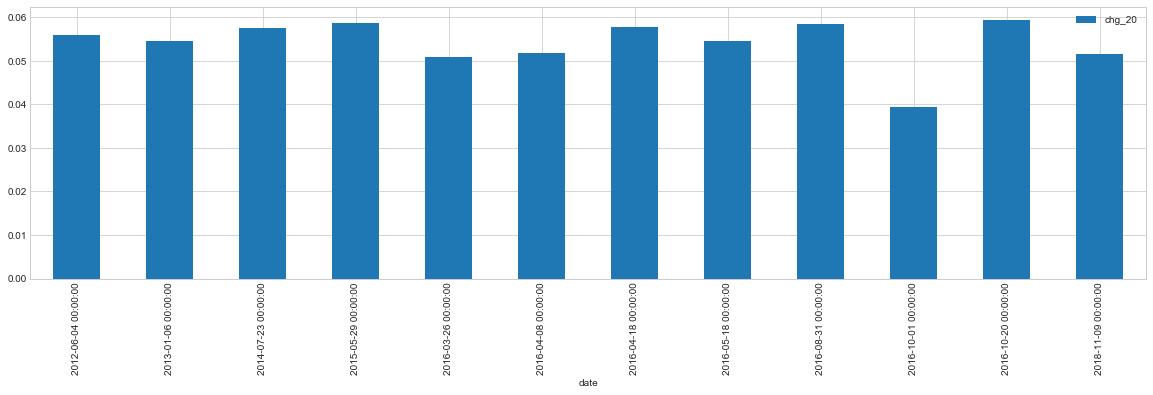

In [330]:
# Histogram of dates and returns
df_lower[['chg_'+str(d)]].plot(
                    kind='bar', 
                    figsize=(20,5))

In [331]:
def find_price(date):
    price = df.loc[date]['close']
    return (price)
    
days_list = [10, 30, 90, 365]
cols = ['close']
for element in days_list:
    df_lower['date_after_' + str(element) + '_days'] = df_lower['n_days'] + pd.DateOffset(element)
    df_lower['price_after_' + str(element) + '_days'] = df_lower['date_after_' + str(element) + '_days'].apply(find_price)
    cols.append('price_after_' + str(element) + '_days')
    df_lower['return_after_' + str(element) + '_days'] = (df_lower['price_after_' + str(element) + '_days'] / df_lower['close']) - 1
    cols.append('return_after_' + str(element) + '_days')

df_lower[cols]

,close,price_after_10_days,return_after_10_days,price_after_30_days,return_after_30_days,price_after_90_days,return_after_90_days,price_after_365_days,return_after_365_days
date,,,,,,,,,
2012-06-04,5.266,5.954,0.130649,6.51,0.236232,10.20,0.936954,121.40,22.053551
2013-01-06,13.450,14.730,0.095167,20.60,0.531599,142.63,9.604461,1012.65,74.289963
2014-07-23,621.690,591.720,-0.048207,516.10,-0.169843,382.35,-0.384983,275.52,-0.556821
2015-05-29,237.030,228.570,-0.035692,248.88,0.049994,222.73,-0.060330,524.22,1.211619
2016-03-26,416.510,422.070,0.013349,461.73,0.108569,656.89,0.577129,969.44,1.327531
2016-04-08,417.690,427.690,0.023941,457.87,0.096196,635.25,0.520865,1180.78,1.826929
2016-04-18,427.690,448.480,0.048610,454.22,0.062031,676.33,0.581356,1206.09,1.820010
2016-05-18,454.220,524.220,0.154110,743.90,0.637753,580.19,0.277333,1880.99,3.141143
2016-08-31,573.880,624.520,0.088241,608.14,0.059699,732.56,0.276504,4735.11,7.251046


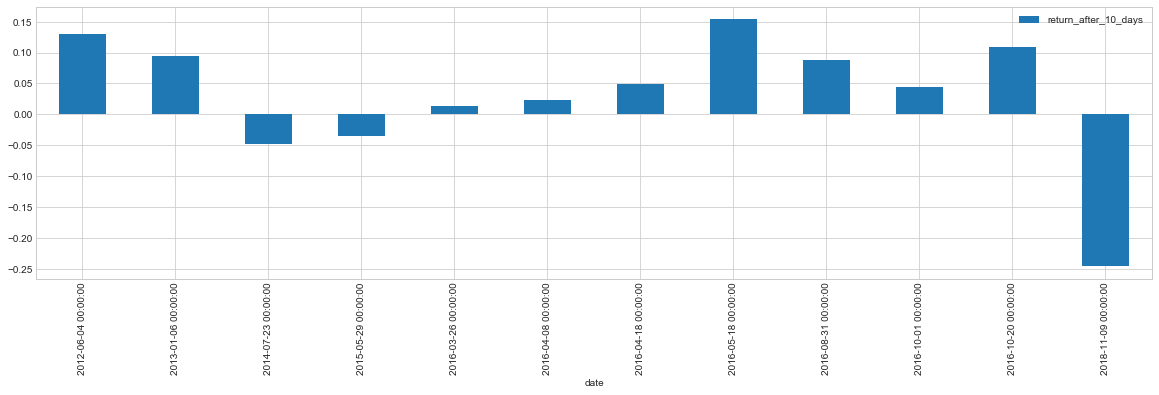

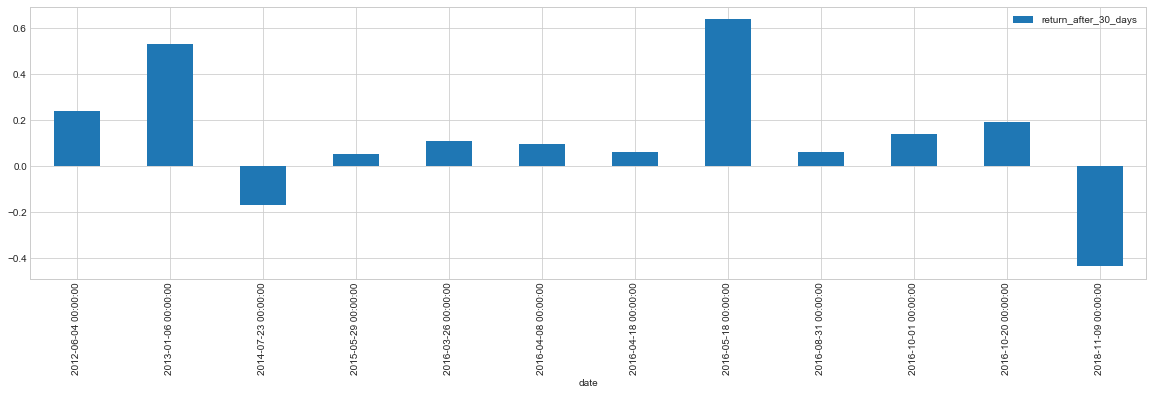

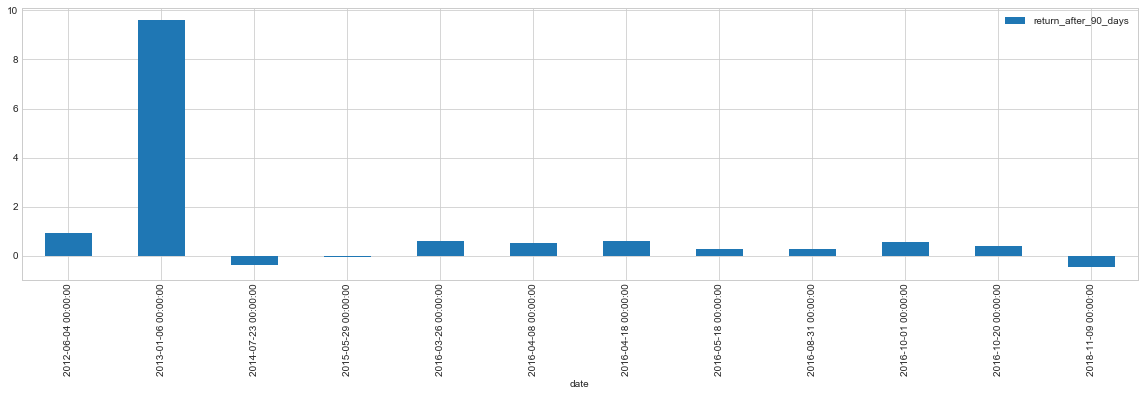

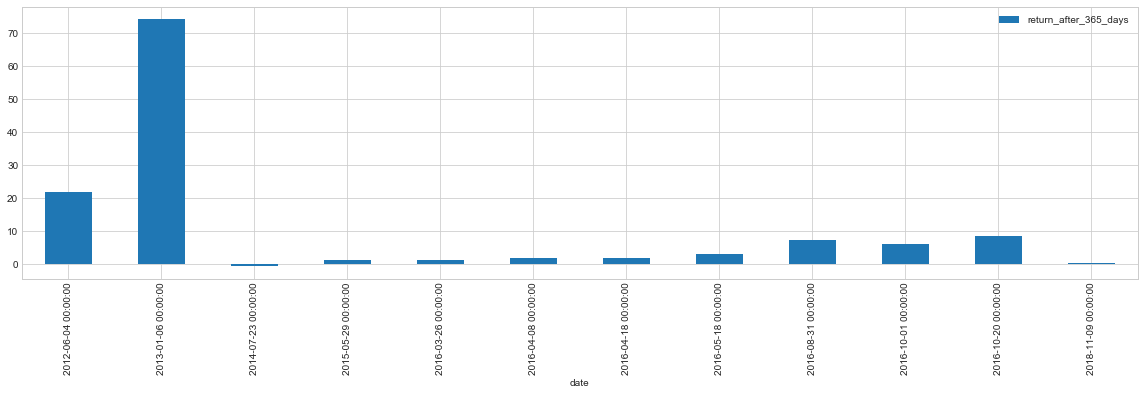

In [332]:
# Average results
for element in days_list:
    df_lower[['return_after_'+str(element)+'_days']].plot(
                    kind='bar', 
                    figsize=(20,5))


In [333]:
# Summary for each date range
for element in days_list:
    print ('-------------------------------------------------------------')
    print ('Results for ' + str(element) + ' days')
    print ('average return = ' + str(df_lower[['return_after_'+str(element)+'_days']].mean()[0] * 100) + '%')
    print ('min return = ' + str(df_lower[['return_after_'+str(element)+'_days']].min()[0] * 100) + '%')
    print ('max return = ' + str(df_lower[['return_after_'+str(element)+'_days']].max()[0] * 100) + '%')

-------------------------------------------------------------
Results for 10 days
average return = 3.150411971821513%
min return = -24.590348997097834%
max return = 15.41103430055919%
-------------------------------------------------------------
Results for 30 days
average return = 12.540028269842482%
min return = -43.668146234158414%
max return = 63.77526308837125%
-------------------------------------------------------------
Results for 90 days
average return = 106.74826245031568%
min return = -47.078468294870326%
max return = 960.4460966542752%
-------------------------------------------------------------
Results for 365 days
average return = 1062.2021107313813%
min return = -55.68209236114463%
max return = 7428.996282527881%
